# Importer les librairies

## Librairies pour importer, structurer explorer les données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorer les méssages d'avertissements
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Importation des données:

In [2]:
df = pd.read_csv("data.csv")
# Let's take a look at the top of the dataset:
df.head()

,ID,Ventes_ p1,Demande_P1,Ventes_ p2,Demande_P2,Ventes_ p3,Demande_P3,Ventes_ p4,Demande_P4,Demande,Vente
0,1,"549,68","603,410313296384","711,68","603,613968311092","479,5","576,976831091183","299,5","152,245833333333",NaN,NaN
1,2,"635,4","697,509301900238","1047,44","888,390027776206",872,"1049,26756352766",161,"81,8416666666666",NaN,NaN
2,3,"524,52","575,7909647981","1042,44","884,149259675998",883,"1062,50373692078","260,5","132,420833333333",NaN,NaN
3,4,"550,84","604,683701382951","1190,78","1009,96436767295",829,"997,526158445444",150,"76,25",NaN,NaN
4,5,"55,14","60,5298440459224","27,34","23,188519971933",28,"33,6920777279523",0,0,NaN,NaN


In [3]:
copy=df.copy()

## **Exploration et préparation des données:**

In [4]:
# Pour voir les informations concernant toutes les colonnes, y compris le nombre de valeurs manquantes pour chacune:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1187 non-null   int64  
 1   Ventes_ p1  1186 non-null   object 
 2   Demande_P1  1186 non-null   object 
 3   Ventes_ p2  1186 non-null   object 
 4   Demande_P2  1186 non-null   object 
 5   Ventes_ p3  1186 non-null   object 
 6   Demande_P3  1186 non-null   object 
 7   Ventes_ p4  1185 non-null   object 
 8   Demande_P4  1186 non-null   object 
 9   Demande     1 non-null      float64
 10  Vente       1 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 102.1+ KB


In [5]:
# Des statistiques descriptives pour les valeurs numériques :
df.describe()

,ID,Demande,Vente
count,1187.000000,1.00,1.000
mean,593.000842,10000.25,125000.258
std,342.800235,NaN,NaN
min,1.000000,10000.25,125000.258
25%,296.500000,10000.25,125000.258
50%,593.000000,10000.25,125000.258
75%,889.500000,10000.25,125000.258
max,1186.000000,10000.25,125000.258


* **La distribution des ventes:**

<Axes: xlabel='Ventes_ p4', ylabel='Count'>

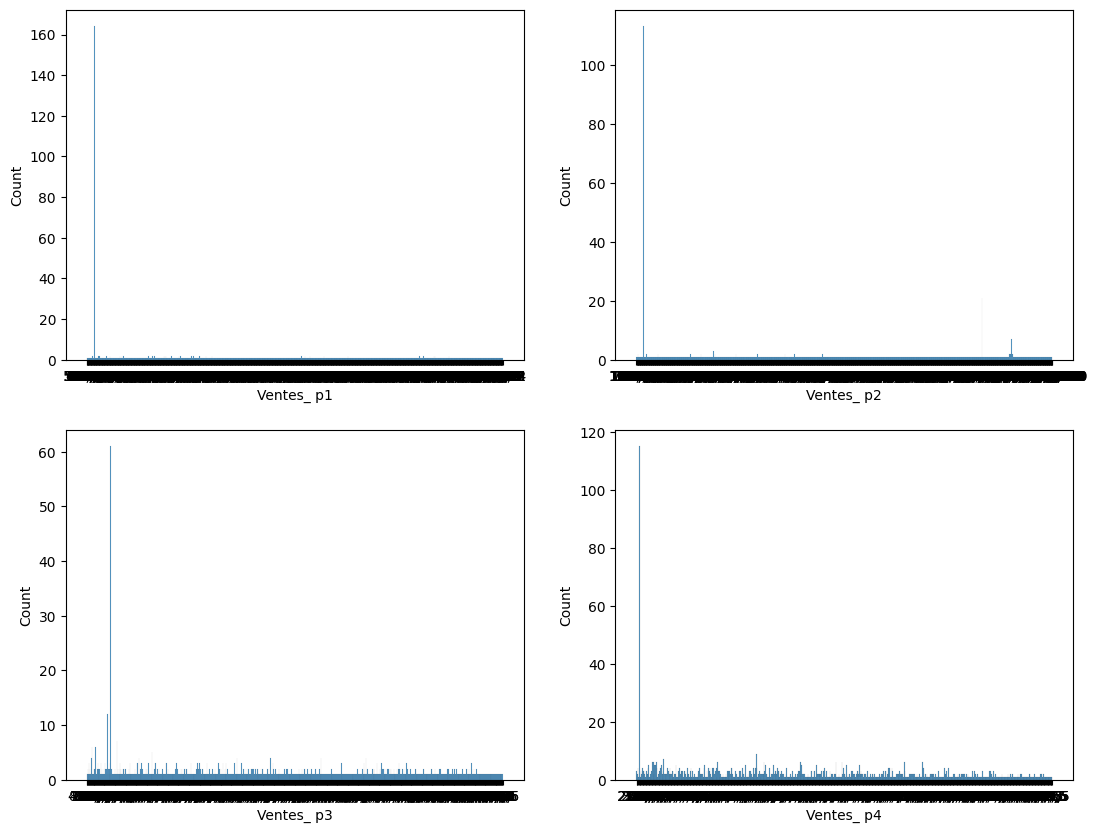

In [8]:
fig, axarr  = plt.subplots(2,2,figsize=(13,10))
sns.histplot(x='Ventes_ p1', data=df, ax=axarr[0,0])
sns.histplot(x='Ventes_ p2', data=df, ax=axarr[0,1])
sns.histplot(x='Ventes_ p3', data=df, ax=axarr[1,0])
sns.histplot(x='Ventes_ p4', data=df, ax=axarr[1,1])

*   **La destribution de la demende:**

In [10]:
# Détection des valeurs manquantes:
df.isnull().sum()

ID               0
Ventes_ p1       1
Demande_P1       1
Ventes_ p2       1
Demande_P2       1
Ventes_ p3       1
Demande_P3       1
Ventes_ p4       2
Demande_P4       1
Demande       1186
Vente         1186
dtype: int64

In [11]:
# Détection des valeurs dupliquées:
df.duplicated().sum()

0

In [12]:
# Suppression des valeurs manquantes:
df = df.dropna()
df.isnull().sum()

ID            0.0
Ventes_ p1    0.0
Demande_P1    0.0
Ventes_ p2    0.0
Demande_P2    0.0
Ventes_ p3    0.0
Demande_P3    0.0
Ventes_ p4    0.0
Demande_P4    0.0
Demande       0.0
Vente         0.0
dtype: float64

### Détection des valeurs aberrantes:

1.   **Methode graphique:** *La boîte à moustaches*

<Axes: >

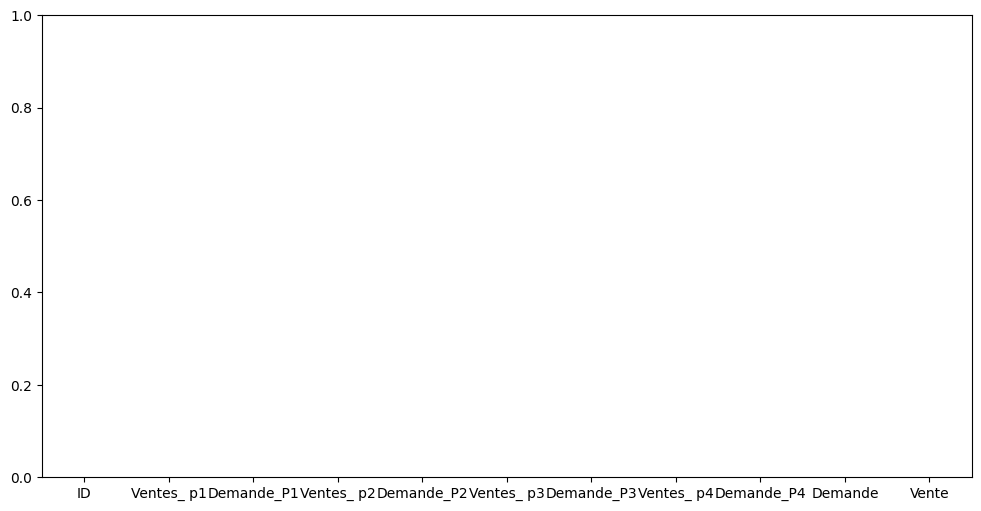

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df)

En se basant sur la boîte à moustaches , on peut constater que certaines colonnes (Ventes_p1, Demande_p1, ventes_p4 et Demande_p4) contiennent des valeurs aberrantes. Plongeons plus en profondeur et examinons les lignes qui contiennent ces valeurs aberrantes en utilisant la méthode de (IQR)*texte en italique*










2.   **Methode mathématique:** *La méthode IQR*

In [15]:
#Pour ventes_p1:
from scipy.stats import iqr
IQR = iqr(df["Ventes_ p1"])
lower_threshold_1 = np.quantile(df["Ventes_ p1"], 0.25) - 1.5 * IQR
upper_threshold_1 = np.quantile(df["Ventes_ p1"], 0.75) + 1.5 * IQR
T_outliers_1 = df[(df["Ventes_ p1"] < lower_threshold_1) | (df["Ventes_ p1"] > upper_threshold_1)]
T_outliers_1

IndexError: cannot do a non-empty take from an empty axes.

In [ ]:
# Pour Demande_p1:
from scipy.stats import iqr
IQR = iqr(df["Demande_P1"])
lower_threshold_2 = np.quantile(df["Demande_P1"], 0.25) - 1.5 * IQR
upper_threshold_2 = np.quantile(df["Demande_P1"], 0.75) + 1.5 * IQR
T_outliers_2 = df[(df["Demande_P1"] < lower_threshold_2) | (df["Demande_P1"] > upper_threshold_2)]
T_outliers_2

In [ ]:
# Pour ventes_p4:
from scipy.stats import iqr
IQR = iqr(df["Ventes_p4"])
lower_threshold_3 = np.quantile(df["Ventes_p4"], 0.25) - 1.5 * IQR
upper_threshold_3 = np.quantile(df["Ventes_p4"], 0.75) + 1.5 * IQR
T_outliers_3 = df[(df["Ventes_p4"] < lower_threshold_3) | (df["Ventes_p4"] > upper_threshold_3)]
T_outliers_3

In [ ]:
# Pour Demande_p4:
from scipy.stats import iqr
IQR = iqr(df["Demande_ p4"])
lower_threshold_4 = np.quantile(df["Demande_ p4"], 0.25) - 1.5 * IQR
upper_threshold_4 = np.quantile(df["Demande_ p4"], 0.75) + 1.5 * IQR
T_outliers_4 = df[(df["Demande_ p4"] < lower_threshold_4) | (df["Demande_ p4"] > upper_threshold_4)]
T_outliers_4

**L'existence de valeurs aberrantes peut avoir un impact significatif sur les résultats d'une analyse statistique ou d'un modèle prédictif. C'est pourquoi il est courant de supprimer ces valeurs afin d'atténuer leur influence.**

In [ ]:
# Suppression des valeurs aberrantes:
df= df[(df["Ventes_ p1 "] < upper_threshold_1) & (df["Ventes_ p1 "] > lower_threshold_1)]
df= df[(df["Demande_P1"] < upper_threshold_2) & (df["Demande_P1"] > lower_threshold_2)]
df= df[(df["Ventes_p4"] < upper_threshold_3) & (df["Ventes_p4"] > lower_threshold_3)]
df= df[(df["Demande_ p4"] < upper_threshold_4) & (df["Demande_ p4"] > lower_threshold_4)]

In [ ]:
# Vérification des résultats après suppression des valeurs aberrantes:
df.info()

In [ ]:
#Suppression du colonne ID:
df = df.drop(columns=("ID"))

In [ ]:
df.head()

## **Analyse de lien entre les variables:**

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
fig, axarr  = plt.subplots(2,2,figsize=(13,10))
sns.scatterplot(x='Demande_P1', y="Ventes_ p1 ", data=df, ax=axarr[0,0], palette='deep')
sns.scatterplot(x='Demande_p2', y='Ventes_ p2', data=df, ax=axarr[0,1], palette='deep')
sns.scatterplot(x='Demande_p3', y='Ventes_p3', data=df, ax=axarr[1,0], palette='deep')
sns.scatterplot(x='Demande_ p4', y='Ventes_p4', data=df, ax=axarr[1,1], palette='deep')

**D'après les résultats precedents, On peut confirmer l'existence d'une corrélation entre chaque vente et sa demande respective. Cependant, il convient de noter que la nature de cette corrélation est non linéaire.**

## Modélisation:

### Choix des variables pour la modélisation

##### **On commence par "Vente_p1" et "Demande_P1"**:

In [16]:
#On commence par "Ventes_p1" et "demande_P1":
X_1 = df['Demande_P1']
y_1 = df['Ventes_ p1 ']

KeyError: 'Ventes_ p1 '

***Diviser la base en un ensemble d'apprentissage et un ensemble de test (80 pour l'apprentissage et 20% pour le test)***

In [ ]:
from sklearn import model_selection
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X_1, y_1, test_size = 0.20, random_state = 42)

In [ ]:
# Verification après la division du base:
X1_train.shape , y1_train.shape, X1_test.shape, y1_test.shape

In [ ]:
#Remodelage des données d'entraînement et de test
X1_train = np.array(X1_train).reshape(-1, 1)
y1_train = np.array(y1_train).reshape(-1, 1)
X1_test = np.array(X1_test).reshape(-1, 1)
y1_test = np.array(y1_test).reshape(-1, 1)

### Modèle de régression utilisant  les arbres de décision:

In [ ]:
#Importation de la librairie
from sklearn.tree import DecisionTreeRegressor
# Création du modèle Arbre de décision
tree = DecisionTreeRegressor()
# Apprentissage du modèle utilisant la base d'apprentissage
tree.fit(X1_train,y1_train)

### Modèle de régression utilisant  K-nearest neighbors (kNN):


**Le choix de la valeur de K est important et peut avoir un impact significatif sur les prédictions du modèle. C'est pourpour cela on va utiliser une méthode graphique pour décider du nombre optimal de voisins (K) à choisir.**

In [ ]:
#Importation de la librairie
from sklearn.neighbors import KNeighborsRegressor

#Création du modèle KNN
knn_5 = KNeighborsRegressor() # K=5 valeure par défaut
# Apprentissage du modèle utilisant la base d'apprentissage
knn_5.fit(X1_train,y1_train)

In [ ]:
#Créetion un dictionnaire vide pour stocker nos "train & test accuracies"
train_accuracies = {}
test_accuracies = {}

# Création d'un tableau numpy contenant une plage de valeurs de k (nombre de k) :
neighbors = np.arange(1, 26)
#
for neighbor in neighbors:
   knn = KNeighborsRegressor(n_neighbors=neighbor)
   knn.fit(X1_train, y1_train)
   train_accuracies[neighbor] = knn.score(X1_train, y1_train)
   test_accuracies[neighbor] = knn.score(X1_test, y1_test)

# Representation graphique des résulatas:
plt.figure(figsize = (12, 6))
plt.title("knn: Variation du nombre de voisins")
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("Nombre de voisins")
plt.ylabel("Accuracy")
plt.show()

**En se basant sur la ligne orange qui représente "testing accuracy" on peut choisir soit K = 3 ou K = 5.**

In [ ]:
#Importation de la librairie
from sklearn.neighbors import KNeighborsRegressor

#Création du modèle KNN
knn_5 = KNeighborsRegressor() # K=5 valeure par défaut
# Apprentissage du modèle utilisant la base d'apprentissage
knn_5.fit(X1_train,y1_train)

In [ ]:
#Affichages des hyperparameter du modèle KNN
knn_5.get_params()

In [ ]:
# Création du modèle KNN avec K=3
knn_3 = KNeighborsRegressor(n_neighbors=3)
# Apprentissage du modèle utilisant la base d'apprentissage
knn_3.fit(X1_train,y1_train)

### Evaluation des modèles:

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Evaluation du modèle Arbre de décision:

In [ ]:
# Prédiction de y utilisant le modèle arbre de décision
pred_tree= tree.predict(X1_test)

In [ ]:
# Clacul de MAE, MSE, RMSE, R et R²
mae_TREE = mean_absolute_error(y1_test, pred_tree)
mse_TREE = mean_squared_error(y1_test, pred_tree)
rmse_TREE= np.sqrt(mse_TREE)
r2_score = tree.score(X1_test, y1_test)
r_score = np.sqrt(r2_score)
print ("MAE Modèle TREE=", mae_TREE)
print ("MSE Modèle TREE=", mse_TREE)
print("RMSE Modèle TREE=" , rmse_TREE)
print("R= ", r_score)
print("R²= ", r2_score)

### Evaluation du modèle KNN:

In [ ]:
# Prédiction de y utilisant les modèles KNN (K=5 et K=3)
pred_5 = knn_5.predict(X1_test)
pred_3 = knn_3.predict(X1_test)

In [ ]:
# Clacul de MAE, MSE, RMSE, R et R² pour le modèle KNN (K = 5)
mae_KNN_5 = mean_absolute_error(y1_test, pred_5)
mse_KNN_5 = mean_squared_error(y1_test, pred_5)
rmse_KNN_5 = np.sqrt(mse_KNN_5)
r2_score = knn_5.score(X1_test, y1_test)
r_score = np.sqrt(r2_score)
print ("MAE KNN (K=5)=", mae_KNN_5)
print ("MSE KNN (K=5)=", mse_KNN_5)
print("RMSE KNN (K=5)=" , rmse_KNN_5)
print("R= ", r_score)
print("R²= ", r2_score)

In [ ]:
# Clacul de MAE, MSE, RMSE, R et R² pour le modèle KNN (K = 3)
mae_KNN_3 = mean_absolute_error(y1_test, pred_3)
mse_KNN_3 = mean_squared_error(y1_test, pred_3)
rmse_KNN_3 = np.sqrt(mse_KNN_3)
r2_score = knn_3.score(X1_test, y1_test)
r_score = np.sqrt(r2_score)
print ("MAE KNN (K=3)=", mae_KNN_3)
print ("MSE KNN (K=3)=", mse_KNN_3)
print("RMSE KNN (K=3)=" , rmse_KNN_3)
print("R= ", r_score)
print("R²= ", r2_score)

#### Conclusion :
**En se basant sur les métriques d'évaluation des modèles KNN avec k = 5 et k = 3, on peut conclure que le modèle KNN avec k = 5 est meilleur que le modèle avec k = 3.**

* **Maintenant, nous allons effectuer la même démarche pour les autres variables**

In [ ]:
df.columns

In [ ]:
#On commence par "Ventes_p2" et "demande_P2":
X_2 = df['Demande_p2']
y_2 = df['Ventes_ p2']

* **Diviser la base en un ensemble d'apprentissage et un ensemble de test (80 pour l'apprentissage et 20% pour le test)**

In [ ]:
from sklearn import model_selection
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X_2, y_2, test_size = 0.20, random_state = 42)

In [ ]:
# Verification après la division du base:
X2_train.shape , y2_train.shape, X2_test.shape, y2_test.shape

In [ ]:
#Remodelage des données d'entraînement et de test
X2_train = np.array(X2_train).reshape(-1, 1)
y2_train = np.array(y2_train).reshape(-1, 1)
X2_test = np.array(X2_test).reshape(-1, 1)
y2_test = np.array(y2_test).reshape(-1, 1)

### Modèle de régression utilisant  les arbres de décision:

In [ ]:
#Importation de la librairie
from sklearn.tree import DecisionTreeRegressor
# Création du modèle Arbre de décision
tree = DecisionTreeRegressor()
# Apprentissage du modèle utilisant la base d'apprentissage
tree.fit(X2_train,y2_train)

### Modèle de régression utilisant K-nearest neighbors (kNN):

D'après l'exemple précédent, nous avons constaté que le modèle KNN avec k = 5 est meilleur que le modèle avec k = 3. Par conséquent, dans cette étape, nous avons choisi le modèle en fixant k = 5.

In [ ]:
#Importation de la librairie
from sklearn.neighbors import KNeighborsRegressor

#Création du modèle KNN
knn_2 = KNeighborsRegressor() # K=5 valeur par défaut
# Apprentissage du modèle utilisant la base d'apprentissage
knn_2.fit(X2_train,y2_train)

In [ ]:
#Affichages des hyperparameter du modèle KNN
knn_2.get_params()

### Evaluation des modèles:

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

* **Evaluation du modèle Arbre de décision:**

In [ ]:
# Prédiction de y utilisant le modèle arbre de décision
pred_tree= tree.predict(X2_test)

In [ ]:
# Clacul de MAE, MSE, RMSE, R et R²
mae_TREE = mean_absolute_error(y2_test, pred_tree)
mse_TREE = mean_squared_error(y2_test, pred_tree)
rmse_TREE= np.sqrt(mse_TREE)
r2_score = tree.score(X2_test, y2_test)
r_score = np.sqrt(r2_score)
print ("MAE Modèle TREE=", mae_TREE)
print ("MSE Modèle TREE=", mse_TREE)
print("RMSE Modèle TREE=" , rmse_TREE)
print("R= ", r_score)
print("R²= ", r2_score)

* **Evaluation du modèle KNN:**

In [ ]:
# Prédiction de y utilisant les modèles KNN (K=5 et K=3)
pred_2 = knn_2.predict(X2_test)

In [ ]:
# Clacul de MAE, MSE, RMSE, R et R² pour le modèle KNN (K = 5)
mae_KNN_5 = mean_absolute_error(y1_test, pred_5)
mse_KNN_5 = mean_squared_error(y1_test, pred_5)
rmse_KNN_5 = np.sqrt(mse_KNN_5)
r2_score = knn_5.score(X1_test, y1_test)
r_score = np.sqrt(r2_score)
print ("MAE KNN (K=5)=", mae_KNN_5)
print ("MSE KNN (K=5)=", mse_KNN_5)
print("RMSE KNN (K=5)=" , rmse_KNN_5)
print("R= ", r_score)
print("R²= ", r2_score)

**Alors maintenant, nous allons créer des modèles d'arbre de décision et de modèle KNN pour prédire les ventes du produit P3 en fonction de sa demande**.

In [ ]:
df.columns

In [ ]:
#On commence par "Ventes_p3" et "demande_P3":
X_3 = df['Demande_p3']
y_3 = df['Ventes_p3']

***Diviser la base en un ensemble d'apprentissage et un ensemble de test (80 pour l'apprentissage et 20% pour le test)***

In [ ]:
from sklearn import model_selection
X3_train, X3_test, y3_train, y3_test = model_selection.train_test_split(X_3, y_3, test_size = 0.20, random_state = 42)

In [ ]:
# Verification après la division du base:
X3_train.shape , y3_train.shape, X3_test.shape, y3_test.shape

In [ ]:
#Remodelage des données d'entraînement et de test
X3_train = np.array(X3_train).reshape(-1, 1)
y3_train = np.array(y3_train).reshape(-1, 1)
X3_test = np.array(X3_test).reshape(-1, 1)
y3_test = np.array(y3_test).reshape(-1, 1)

### Modèle de régression utilisant  les arbres de décision:

In [ ]:
#Importation de la librairie
from sklearn.tree import DecisionTreeRegressor
# Création du modèle Arbre de décision
tree = DecisionTreeRegressor()
# Apprentissage du modèle utilisant la base d'apprentissage
tree.fit(X3_train,y3_train)

### Modèle de régression utilisant K-nearest neighbors (kNN):

*D'après l'exemple précédent, nous avons constaté que le modèle KNN avec k = 5 est meilleur que le modèle avec k = 3. Par conséquent, dans cette étape, nous avons choisi le modèle en fixant k = 5.*

In [ ]:
#Importation de la librairie
from sklearn.neighbors import KNeighborsRegressor

#Création du modèle KNN
knn_3 = KNeighborsRegressor() # K=5 valeur par défaut
# Apprentissage du modèle utilisant la base d'apprentissage
knn_3.fit(X3_train,y3_train)

In [ ]:
#Affichages des hyperparameter du modèle KNN
knn_3.get_params()

### Evaluation des modèles:

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

* **Evaluation du modèle Arbre de décision:**

In [ ]:
# Prédiction de y utilisant le modèle arbre de décision
pred_tree= tree.predict(X3_test)

In [ ]:
# Clacul de MAE, MSE, RMSE, R et R²
mae_TREE = mean_absolute_error(y3_test, pred_tree)
mse_TREE = mean_squared_error(y3_test, pred_tree)
rmse_TREE= np.sqrt(mse_TREE)
r2_score = tree.score(X3_test, y3_test)
r_score = np.sqrt(r2_score)
print ("MAE Modèle TREE=", mae_TREE)
print ("MSE Modèle TREE=", mse_TREE)
print("RMSE Modèle TREE=" , rmse_TREE)
print("R= ", r_score)
print("R²= ", r2_score)

* **Evaluation du modèle KNN:**

In [ ]:
# Prédiction de y utilisant les modèles KNN (K=5 et K=3)
pred_3 = knn_3.predict(X3_test)

In [ ]:
# Clacul de MAE, MSE, RMSE, R et R² pour le modèle KNN (K = 5)
mae_KNN_5 = mean_absolute_error(y3_test, pred_5)
mse_KNN_5 = mean_squared_error(y3_test, pred_5)
rmse_KNN_5 = np.sqrt(mse_KNN_5)
r2_score = knn_5.score(X3_test, y3_test)
r_score = np.sqrt(r2_score)
print ("MAE KNN (K=5)=", mae_KNN_5)
print ("MSE KNN (K=5)=", mse_KNN_5)
print("RMSE KNN (K=5)=" , rmse_KNN_5)
print("R= ", r_score)
print("R²= ", r2_score)

 **Maintenant, nous allons effectuer la même démarche pour créer des modèles d'arbre de décision et de modèle KNN afin de prévoir les ventes du produit P4 en se basant sur sa demande.**

In [ ]:
#On commence par "Ventes_p3" et "demande_P3":
X_4 = df['Demande_ p4']
y_4 = df['Ventes_p4']

* **Diviser la base en un ensemble d'apprentissage et un ensemble de test (80 pour l'apprentissage et 20% pour le test)**

In [ ]:
from sklearn import model_selection
X4_train, X4_test, y4_train, y4_test = model_selection.train_test_split(X_4, y_4, test_size = 0.20, random_state = 42)

In [ ]:
# Verification après la division du base:
X4_train.shape , y4_train.shape, X4_test.shape, y4_test.shape

In [ ]:
#Remodelage des données d'entraînement et de test
X4_train = np.array(X4_train).reshape(-1, 1)
y4_train = np.array(y4_train).reshape(-1, 1)
X4_test = np.array(X4_test).reshape(-1, 1)
y4_test = np.array(y4_test).reshape(-1, 1)

### Modèle de régression utilisant  les arbres de décision:

In [ ]:
#Importation de la librairie
from sklearn.tree import DecisionTreeRegressor
# Création du modèle Arbre de décision
tree = DecisionTreeRegressor()
# Apprentissage du modèle utilisant la base d'apprentissage
tree.fit(X4_train,y4_train)

### Modèle de régression utilisant  K-nearest neighbors (kNN):

D'après l'exemple précédent, nous avons constaté que le modèle KNN avec k = 5 est meilleur que le modèle avec k = 3. Par conséquent, dans cette étape, nous avons choisi le modèle en fixant k = 5.

In [ ]:
#Importation de la librairie
from sklearn.neighbors import KNeighborsRegressor

#Création du modèle KNN
knn_5 = KNeighborsRegressor() # K=5 valeur par défaut
# Apprentissage du modèle utilisant la base d'apprentissage
knn_5.fit(X4_train,y4_train)

In [ ]:
#Affichages des hyperparameter du modèle KNN
knn_5.get_params()

### Evaluation des modèles:

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

* **Evaluation du modèle Arbre de décision:**

In [ ]:
# Prédiction de y utilisant le modèle arbre de décision
pred_tree= tree.predict(X4_test)

In [ ]:
# Clacul de MAE, MSE, RMSE, R et R²
mae_TREE = mean_absolute_error(y4_test, pred_tree)
mse_TREE = mean_squared_error(y4_test, pred_tree)
rmse_TREE= np.sqrt(mse_TREE)
r2_score = tree.score(X4_test, y4_test)
r_score = np.sqrt(r2_score)
print ("MAE Modèle TREE=", mae_TREE)
print ("MSE Modèle TREE=", mse_TREE)
print("RMSE Modèle TREE=" , rmse_TREE)
print("R= ", r_score)
print("R²= ", r2_score)

* **Evaluation du modèle KNN:**

In [ ]:
# Prédiction de y utilisant les modèles KNN (K=5 et K=3)
pred_5 = knn_5.predict(X4_test)

In [ ]:
# Clacul de MAE, MSE, RMSE, R et R² pour le modèle KNN (K = 5)
mae_KNN_5 = mean_absolute_error(y4_test, pred_5)
mse_KNN_5 = mean_squared_error(y4_test, pred_5)
rmse_KNN_5 = np.sqrt(mse_KNN_5)
r2_score = knn_5.score(X4_test, y4_test)
r_score = np.sqrt(r2_score)
print ("MAE KNN (K=5)=", mae_KNN_5)
print ("MSE KNN (K=5)=", mse_KNN_5)
print("RMSE KNN (K=5)=" , rmse_KNN_5)
print("R= ", r_score)
print("R²= ", r2_score)